In [1]:
import os
from tempfile import TemporaryDirectory

# Change the current working directory to a temporary directory to prevent saving files in the documentation directory.
temdir = TemporaryDirectory()
os.chdir(temdir.name)

# Direct modification of the optical system in OpticStudio

This example demonstrates how to use the Optiland backend to directly modify the optical system in OpticStudio.
Similar code for the Optiland backend can be found in the [user guide](../../user_guide/backend_direct.ipynb).

# 

In [2]:
import visisipy

visisipy.set_backend("opticstudio")

model = visisipy.EyeModel()
model.build()

## Obtain the backend object and save the model

In [3]:
backend = visisipy.get_backend()
backend.save_model("eye_model.zmx")

## Insert a new surface

Insert a dummy surface 10 mm before the cornea front.
This does not have any optical effects, but it helps to visualize the incoming beam in the system plots.

In [4]:
oss = visisipy.get_oss()

dummy_surface = oss.LDE.InsertNewSurfaceAt(1)
dummy_surface.Comment = "dummy surface"
dummy_surface.Thickness = 10.0

## Run an OpticStudio analysis

Visisipy does not provide wrappers for all OpticStudio analyses.
Using ZOSPy and the `oss` object, these analyses can still be run.
This is how to show the 3D viewer output of the optical system:

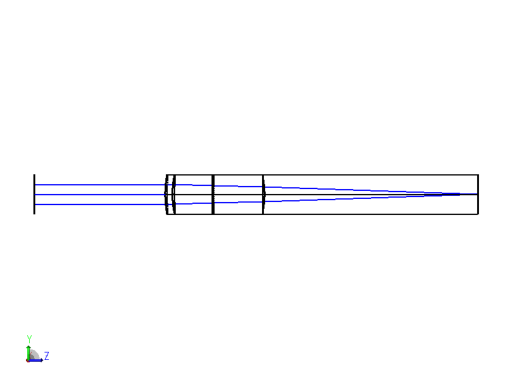

In [5]:
import matplotlib.pyplot as plt
import zospy as zp

cross_section = zp.analyses.systemviewers.Viewer3D(
    surface_line_thickness="Thick", rays_line_thickness="Thick", number_of_rays=5, delete_vignetted=True
).run(oss)

plt.imshow(cross_section.data)
plt.axis("off")

plt.show()